In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df=pd.read_csv('student.csv')
df

,Hours,Score
0,1,52
1,2,57
2,3,65
3,4,70
4,5,75
5,6,80


In [134]:
df.columns


Index(['Hours', 'Score'], dtype='object')

In [135]:
df.shape

(6, 2)

In [136]:
df['Hours']

0    1
1    2
2    3
3    4
4    5
5    6
Name: Hours, dtype: int64

In [137]:
df['Hours'].shape    #(6,) → 6 rows, single Series (no column dimension)

(6,)

In [138]:
Hours=df['Hours'].values.reshape(-1,1) # .values converts Series to NumPy array,Hours is now a 2D NumPy array with 6 rows and 1 column.
Hours.shape

(6, 1)

In [139]:
# Hours=df[['Hours']] # simple way to convert to 2D Numpy array
# Hours.shape

In [140]:
Score=df['Score']

In [141]:
#Train & Test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Split data (80% train and 20% test)
Hours_train,Hours_test,Score_train,Score_test = train_test_split(Hours,Score,test_size=0.2,random_state=42)

#Train Model
model=LinearRegression()
model.fit(Hours_train,Score_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [142]:
#Predict on test set
y_predict=model.predict(Hours_test)

In [143]:
print("Test data (Hours_test):", Hours_test[0])
print("Actual marks:", Score_test[0])
print("Predicted marks:", y_predict[0])

Test data (Hours_test): [1]
Actual marks: 52
Predicted marks: 55.0


In [144]:
#Evaluation Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae=mean_absolute_error(Score_test,y_predict)
mse=mean_squared_error(Score_test,y_predict)
rmse=root_mean_squared_error(Score_test,y_predict)
r2=r2_score(Score_test,y_predict)

In [145]:
print(f'\n Evaluation Metrics')
print(f"MAE  = {mae:.3f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


 Evaluation Metrics
MAE  = 3.000
MSE  = 9.0000
RMSE = 3.00
R²   = -0.44


In [146]:
# User input for prediction

try:
    user_study_hours=float(input("\nEnter number of hours studied"))
    y_pred = model.predict([[user_study_hours]])[0] 
    print(f"Predicted Marks for {user_study_hours:.0f} hour of study is {y_pred:.0f}")
except ValueError:
    print("Invalid input! Please enter a numeric value.")

Predicted Marks for 50 hour of study is 300


Text(0.5, 1.0, 'Hours vs Score (y = mx + c)')

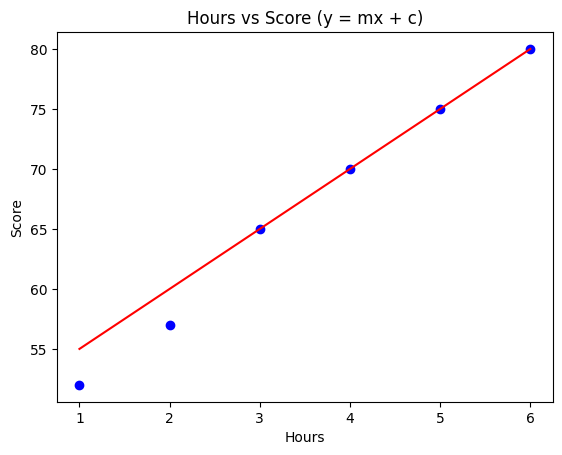

In [150]:

plt.scatter(Hours, Score, color='blue')            # Original data
plt.plot(Hours, model.predict(Hours), color='red') # Regression line
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Hours vs Score (y = mx + c)')